# Predicting U.S. Homelessness with Rent and Demographic Data

**Developed by: JC Dy**

In this project, we will be working with a number of different datasets. The first we examine is a dataset of hundreds of cities across the United States on rent statistics since 2014. Information about the dataset can be found [at this link](https://www.apartmentlist.com/rentonomics/rental-price-data/). The second is a dataset tracking point-in-time estimates of homelessness by CoCs (Continuums of Care) across the United States. Information about the homelessness dataset can be found [at this link](https://www.hudexchange.info/resource/3031/pit-and-hic-data-since-2007/). Lastly, we use U.S. census data for information on statewide and nationwide population.


[State Homelessness Visualizations ](https://endhomelessness.org/homelessness-in-america/homelessness-statistics/state-of-homelessness-report/?gclid=EAIaIQobChMI7KvRne_j3gIVeh-tBh3nCw4NEAAYASAAEgIVjfD_BwE)

In [34]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
rents = pd.read_csv("apartmentrent.csv")
rents.head()

,Location,Location_Type,State,Bedroom_Size,Price_2014_01,Price_2014_02,Price_2014_03,Price_2014_04,Price_2014_05,Price_2014_06,...,Price_2018_01,Price_2018_02,Price_2018_03,Price_2018_04,Price_2018_05,Price_2018_06,Price_2018_07,Price_2018_08,Price_2018_09,Price_2018_10
0,"New York, NY",City,NY,Studio,1780.0,1778.0,1781.0,1786.0,1794.0,1802.0,...,1863.0,1859.0,1861.0,1866.0,1883.0,1905.0,1899.0,1896.0,1895.0,1908
1,"New York, NY",City,NY,1br,1976.0,1975.0,1978.0,1983.0,1992.0,2001.0,...,2069.0,2065.0,2066.0,2073.0,2091.0,2115.0,2108.0,2106.0,2104.0,2119
2,"New York, NY",City,NY,2br,2354.0,2352.0,2356.0,2362.0,2373.0,2384.0,...,2465.0,2460.0,2462.0,2469.0,2491.0,2520.0,2512.0,2509.0,2506.0,2524
3,"New York, NY",City,NY,3br,3036.0,3033.0,3038.0,3046.0,3060.0,3074.0,...,3178.0,3172.0,3174.0,3183.0,3211.0,3249.0,3239.0,3235.0,3232.0,3255
4,"New York, NY",City,NY,4br,3381.0,3378.0,3383.0,3392.0,3407.0,3424.0,...,3540.0,3532.0,3535.0,3546.0,3577.0,3619.0,3607.0,3602.0,3599.0,3625


In [36]:
# Which states have the most rental data?
rents.groupby('State').agg('count').sort_values(by='Location', ascending=False).head()

,Location,Location_Type,Bedroom_Size,Price_2014_01,Price_2014_02,Price_2014_03,Price_2014_04,Price_2014_05,Price_2014_06,Price_2014_07,...,Price_2018_01,Price_2018_02,Price_2018_03,Price_2018_04,Price_2018_05,Price_2018_06,Price_2018_07,Price_2018_08,Price_2018_09,Price_2018_10
State,,,,,,,,,,,,,,,,,,,,,
CA,1135,1135,1135,1030,1030,1025,1065,1045,1030,1025,...,1080,1105,1095,1095,1110,1095,1115,1125,1130,1135
TX,570,570,570,540,540,535,540,530,535,505,...,515,545,550,560,565,565,570,570,570,570
FL,510,510,510,440,430,435,440,430,435,405,...,470,490,480,480,465,465,490,505,510,510
MI,490,490,490,435,435,435,430,385,430,345,...,295,380,415,445,445,455,455,455,475,490
IL,345,345,345,310,305,305,315,315,310,310,...,295,320,335,335,335,335,335,340,340,345


In [37]:
# From above, we know the top 16 states we have most data on
top_states = ['CA', 'TX', 'FL', 'MI', 'IL', 'GA', 'OH', 'MA', 'MD', 'PA', 'NC', 'WA', 'VA', 'IN', 'NJ', 'NY']

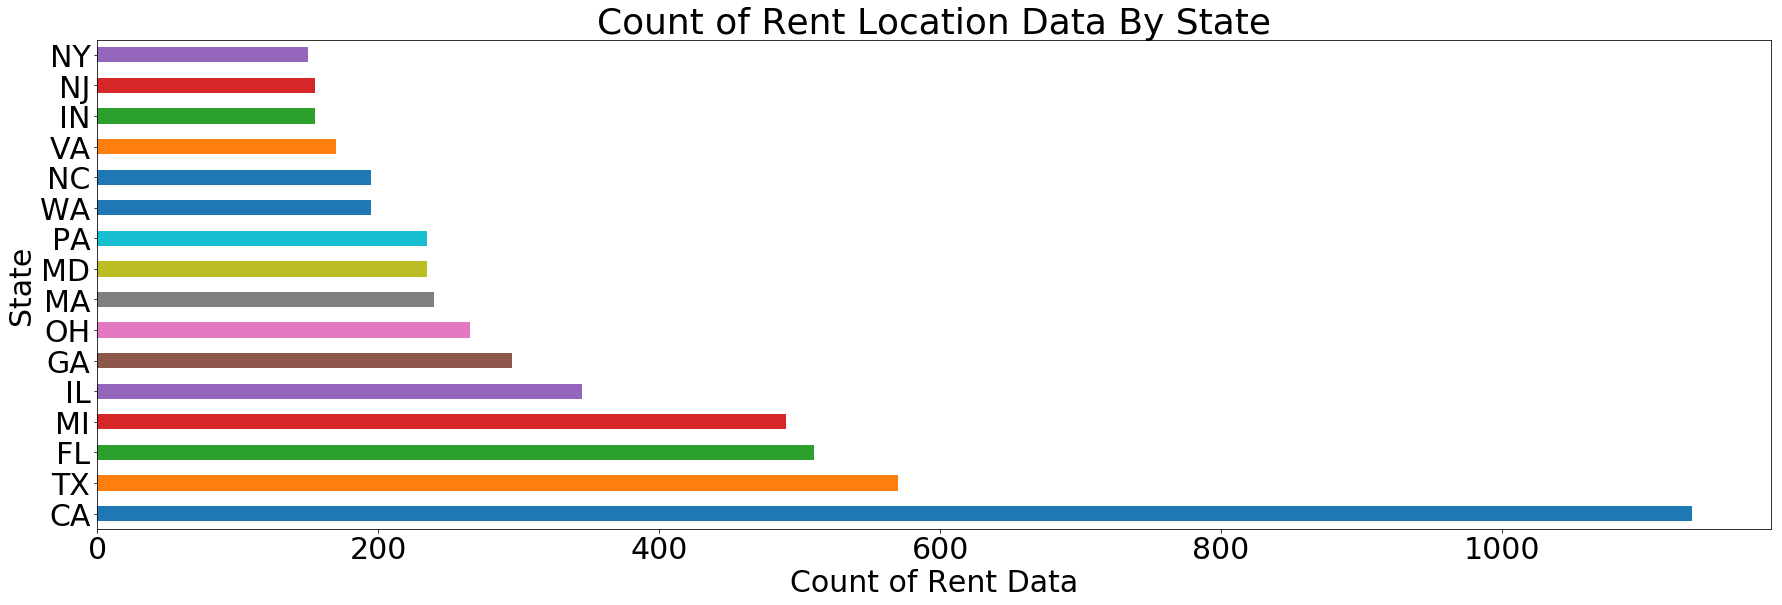

In [38]:
plt.figure(figsize=(30,9))
ax = rents[rents['State'].isin(top_states)]['State'].value_counts().plot(kind='barh')
ax.set_ylabel("State")
ax.set_xlabel("Count of Rent Data")
ax.set_title("Count of Rent Location Data By State");
plt.rcParams.update({'font.size': 30})

In [39]:
num_states = len(rents.groupby(rents['State']))
state_list = set(rents['State'].tolist())

In [50]:
rents.head()

,Location,Location_Type,State,Bedroom_Size,Price_2014_01,Price_2014_02,Price_2014_03,Price_2014_04,Price_2014_05,Price_2014_06,...,Price_2018_01,Price_2018_02,Price_2018_03,Price_2018_04,Price_2018_05,Price_2018_06,Price_2018_07,Price_2018_08,Price_2018_09,Price_2018_10
0,"New York, NY",City,NY,Studio,1780.0,1778.0,1781.0,1786.0,1794.0,1802.0,...,1863.0,1859.0,1861.0,1866.0,1883.0,1905.0,1899.0,1896.0,1895.0,1908
1,"New York, NY",City,NY,1br,1976.0,1975.0,1978.0,1983.0,1992.0,2001.0,...,2069.0,2065.0,2066.0,2073.0,2091.0,2115.0,2108.0,2106.0,2104.0,2119
2,"New York, NY",City,NY,2br,2354.0,2352.0,2356.0,2362.0,2373.0,2384.0,...,2465.0,2460.0,2462.0,2469.0,2491.0,2520.0,2512.0,2509.0,2506.0,2524
3,"New York, NY",City,NY,3br,3036.0,3033.0,3038.0,3046.0,3060.0,3074.0,...,3178.0,3172.0,3174.0,3183.0,3211.0,3249.0,3239.0,3235.0,3232.0,3255
4,"New York, NY",City,NY,4br,3381.0,3378.0,3383.0,3392.0,3407.0,3424.0,...,3540.0,3532.0,3535.0,3546.0,3577.0,3619.0,3607.0,3602.0,3599.0,3625


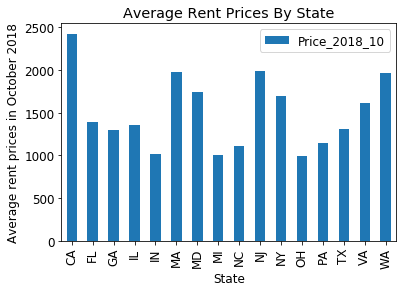

In [76]:
plt.rcParams.update({'font.size': 12})
#ax = sns.countplot(data=rents['Price_2018_10'], x=rents['State'], order=top_states)
ax = rents.loc[rents['State'].isin(top_states)].loc[:,['State', 'Price_2018_10']].groupby(["State"]).agg('mean').plot(kind="bar")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylabel("Average rent prices in October 2018")
ax.set_title("Average Rent Prices By State");

In [69]:
top_rents = rents.loc[rents['State'].isin(top_states)].loc[:,['State', 'Price_2018_10']].groupby(["State"]).agg('mean')

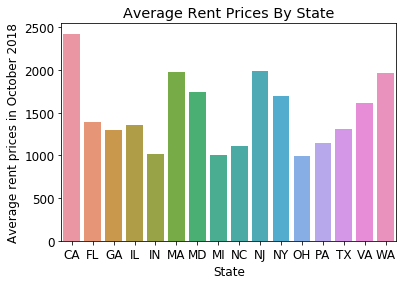

In [74]:
ax = sns.barplot(x="State", y="Price_2018_10", data=top_rents.reset_index())
ax.set_ylabel("Average rent prices in October 2018")
ax.set_title("Average Rent Prices By State");

In [40]:
homeless2014 = pd.read_csv("statehomelessness2014.csv")
homeless2014.head()

,State,Number of CoCs,"Total Homeless, 2014","Sheltered Homeless, 2014","Unsheltered Homeless, 2014","Homeless Individuals, 2014","Sheltered Homeless Individuals, 2014","Unsheltered Homeless Individuals, 2014","Homeless People in Families, 2014","Sheltered Homeless People in Families, 2014",...,"Unsheltered Chronically Homeless, 2014","Chronically Homeless Individuals, 2014","Sheltered Chronically Homeless Individuals, 2014","Unsheltered Chronically Homeless Individuals, 2014","Chronically Homeless People in Families, 2014","Sheltered Chronically Homeless People in Families, 2014","Unsheltered Chronically Homeless People in Families, 2014","Homeless Veterans, 2014","Sheltered Homeless Veterans, 2014","Unsheltered Homeless Veterans, 2014"
0,AK,2.0,"1,784","1,639",145,"1,209","1,109",100,575,530,...,69,182,119,63,24,18,6,178,160,18
1,AL,8.0,"4,561","3,518","1,043","3,115","2,373",742,"1,446","1,145",...,446,618,245,373,111,38,73,542,450,92
2,AR,6.0,"2,936","1,503","1,433","2,303","1,070","1,233",633,433,...,434,516,82,434,3,3,0,361,220,141
3,AZ,3.0,"10,495","7,926","2,569","6,194","3,851","2,343","4,301","4,075",...,643,904,303,601,55,13,42,858,635,223
4,CA,40.0,"113,952","42,515","71,437","90,765","24,857","65,908","23,187","17,658",...,"25,947","28,200","4,417","23,783","2,878",714,"2,164","12,096","4,457","7,639"


In [41]:
homeless2017 = pd.read_csv("statehomelessness2017.csv")
homeless2017.head()

,CoC Number,CoC Name,"Total Homeless, 2017","Sheltered Homeless, 2017","Unsheltered Homeless, 2017","Homeless Individuals, 2017","Sheltered Homeless Individuals, 2017","Unsheltered Homeless Individuals, 2017","Homeless People in Families, 2017","Sheltered Homeless People in Families, 2017",...,"Unsheltered Parenting Youth (Under 25), 2017","Parenting Youth Under 18, 2017","Sheltered Parenting Youth Under 18, 2017","Unsheltered Parenting Youth Under 18, 2017","Parenting Youth Age 18-24, 2017","Sheltered Parenting Youth Age 18-24, 2017","Unsheltered Parenting Youth Age 18-24, 2017","Children of Parenting Youth, 2017","Sheltered Children of Parenting Youth, 2017","Unsheltered Children of Parenting Youth, 2017"
0,AK-500,Anchorage CoC,"1,128",973,155,848,693,155,280,280,...,0,0,0,0,12,12,0,21,21,0
1,AK-501,Alaska Balance of State CoC,717,578,139,506,367,139,211,211,...,0,0,0,0,10,10,0,18,18,0
2,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...","1,092",875,217,932,715,217,160,160,...,0,6,6,0,2,2,0,10,10,0
3,AL-501,Mobile City & County/Baldwin County CoC,606,341,265,426,179,247,180,162,...,0,0,0,0,12,12,0,18,18,0
4,AL-502,Florence/Northwest Alabama CoC,155,133,22,155,133,22,0,0,...,0,0,0,0,0,0,0,0,0,0


## Submission

You're done! 

Before submitting this assignment, ensure to:

1. Restart the Kernel (in the menubar, select Kernel->Restart & Run All)
2. Validate the notebook by clicking the "Validate" button

Finally, make sure to **submit** the assignment via the Assignments tab in Datahub